In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


### TROCAR NOME DO PARQUET
data = pd.read_parquet("new.parquet")
data.head()

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,64,Gold,Defender,1,1,SWAT-CASTLE,0,0
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,81,Gold,Defender,0,1,GSG9-JAGER,0,1
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,150,Gold,Defender,1,1,JTF2-FROST,0,0
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,94,Gold,Defender,0,1,BOPE-CAVEIRA,3,0
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,81,Gold,Defender,0,0,GSG9-JAGER,0,1


# Análise de Dados



- Operadores (Personagens jogáveis com funções distintas)
- Ranks dos Jogadores
- Mapas (Arenas)
- Plataforma
- Duração por Rank

## Operadores:

Para a análse dos opeardores, decidimos olhar os personagens mais escolhidos no geral.

                     Quantidade
operator                       
GSG9-JAGER             6.724058
SWAT-ASH               6.201567
GSG9-BANDIT            4.977917
GIGN-TWITCH            4.922808
SAT-HIBANA             4.896642
SWAT-THERMITE          4.809217
SPETSNAZ-FUZE          4.328392
BOPE-CAVEIRA           4.327083
G.E.O.-JACKAL          4.310267
NAVYSEAL-VALKYRIE      4.021500
SAS-SLEDGE             3.792900
SAS-MUTE               3.776358
G.E.O.-MIRA            3.673717
JTF2-FROST             3.372867
GIGN-ROOK              3.324050
SWAT-PULSE             3.248308
SAS-SMOKE              3.217767
SPETSNAZ-GLAZ          3.178192
SAS-THATCHER           3.007850
GIGN-DOC               2.741533
JTF2-BUCK              2.373350
SPETSNAZ-KAPKAN        2.196192
SWAT-CASTLE            2.167758
NAVYSEAL-BLACKBEARD    1.816367
GIGN-MONTAGNE          1.653900
BOPE-CAPITAO           1.638350
GSG9-IQ                1.513550
SAT-ECHO               1.174442
GSG9-BLITZ             0.680267
GSG9-RES

<Axes: xlabel='Operadores', ylabel='Porcentagem'>

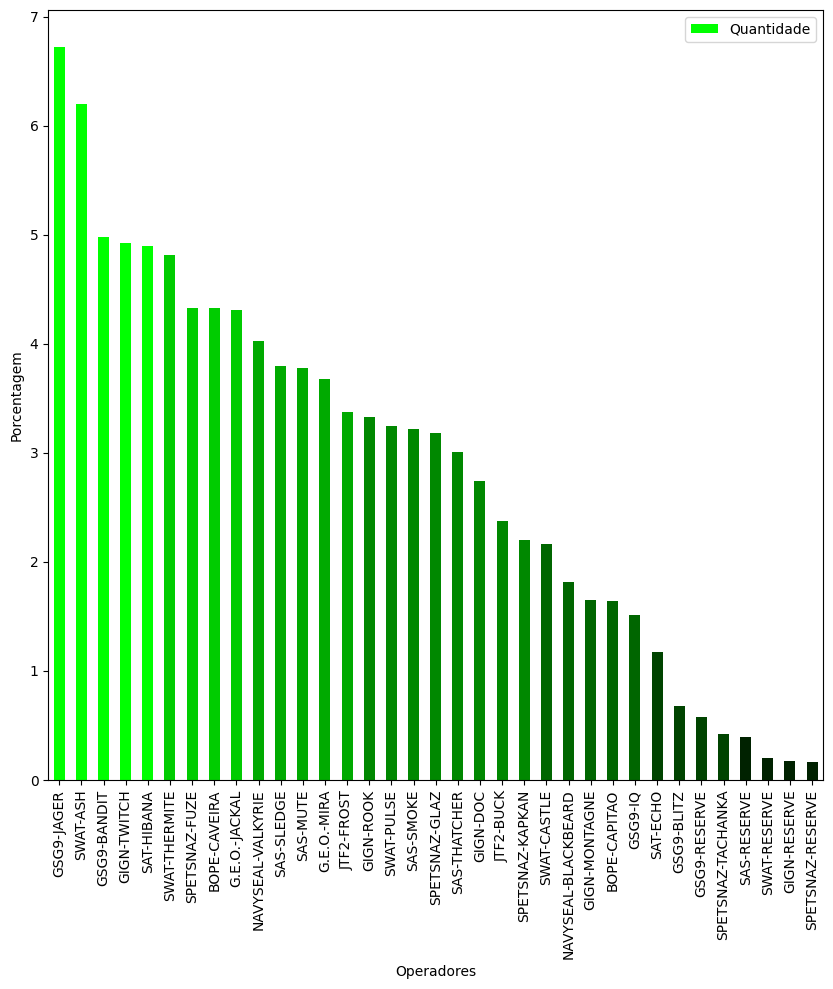

In [26]:
op = data[["operator", "team"]].groupby("operator").count() / data.shape[0] * 100
op.sort_values("team", inplace=True, ascending=False)
op.columns = ['Quantidade']
print(op)

color = ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]
for i in range(op.shape[0]):
    color[i] = "#00FF00"
    if (i > op.shape[0]/8):
        color[i] = "#00CC00"
    if (i > op.shape[0]/4):
        color[i] = "#00AA00"
    if (i > op.shape[0]/8 * 3):
        color[i] = "#008800"
    if (i > op.shape[0]/2):
        color[i] = "#008800"
    if (i > op.shape[0]/8 * 5):
        color[i] = "#006600"
    if (i > op.shape[0]/4 * 3):
        color[i] = "#004400"
    if (i > op.shape[0]/8 * 7):
        color[i] = "#002200"
    

op.plot(kind="bar", y="Quantidade", ylabel="Porcentagem", xlabel="Operadores", fontsize=10, figsize=(10, 10), color=color)

#### Resultado:

Pelo gráfico, podemos notar uma grande diferença entre as escolhas dos jogadores:
- Jogaores preferem escolher os operadores "GSG9-Jager" e "Swat-ASH" acima das outras opções;
- Os operadores que terminam em "Reserve" são os menos escolhidos, representando apenas aproximadamente 1.5% das escolha acumulada.

Possíveis fatores para tais resultados:
- Os personagens mais escolhidos são mais eficientes que os menos escolhidos;
- Os operadores "Reserve" não são divertidos de jogar com.

### Mapa:

Para análise dos mapas, olhamos a média da duração dos rounds que ocorrem em cada mapa.

                     Duracao
mapname                     
BARTLETT_U.       193.216256
BANK              191.439507
KANAL             189.633154
OREGON            189.437566
CLUB_HOUSE        189.215085
CONSULATE         188.928401
KAFE_DOSTOYEVSKY  187.615624
HEREFORD_BASE     187.446095
PLANE             187.062409
COASTLINE         184.963685
BORDER            183.558303
YACHT             182.487232
HOUSE             181.367230
CHALET            181.199831
SKYSCRAPER        180.168563
FAVELAS           175.830815


<Axes: xlabel='Mapa', ylabel='Porcentagem'>

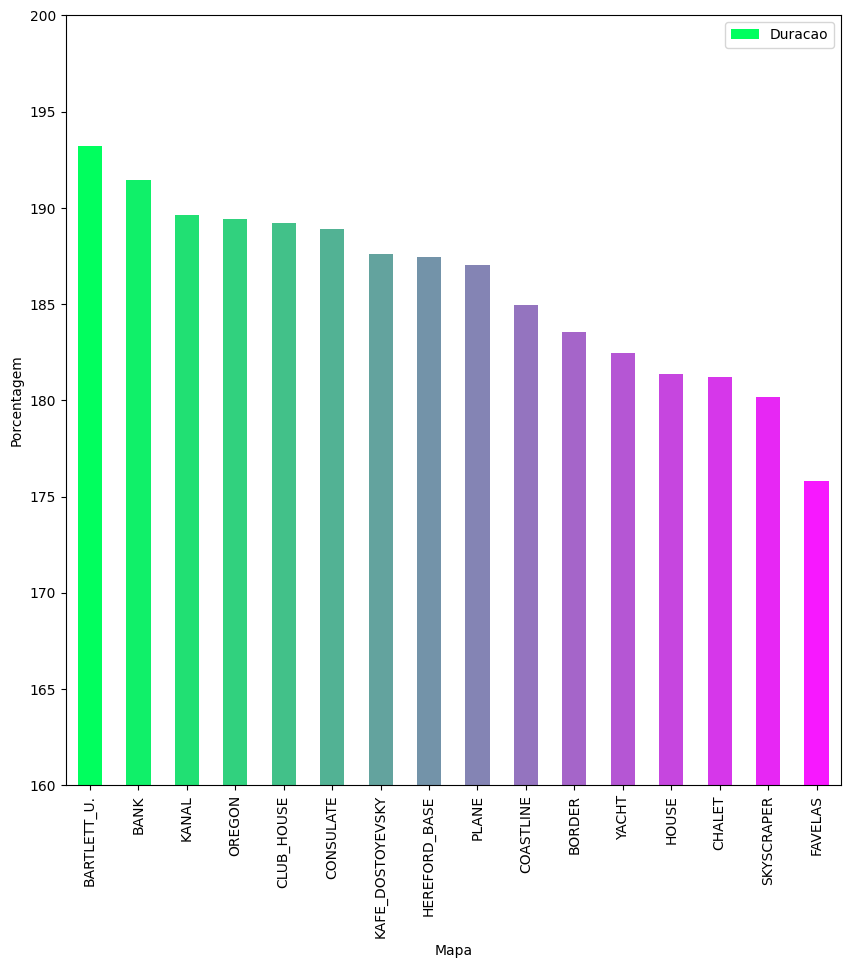

In [27]:
mapa = data[["mapname", "roundduration"]].groupby("mapname").mean()
mapa.columns = ['Duracao']
mapa.sort_values("Duracao", inplace=True, ascending=False)

print(mapa)
colors = ["#00ff5e", "#10f069", "#21e073", "#31d17e", "#42c189", "#52b294", "#63a39e", "#7393a9", "#8484b4", "#9474bf", "#a565c9", "#b556d4", "#c646df", "#d637ea", "#e727f4", "#f718ff"]

mapa.plot(kind="bar", y="Duracao", ylabel="Porcentagem", xlabel="Mapa", fontsize=10, figsize=(10, 10), color=colors, ylim=(160, 200))

#### Resultado:

Pelo gráfico, podemos notar que há uma disparidade na duração dos rounds.
- Mapas como "Bartlett_U" e "Bank" demoram mais, resultando em partidas mais longas;
- Pelo outro lado, "Favelas" demoram consideravelmente menos que os outros mapas.

Possíveis fatores para tais resultados:
- Os mapas colocam as equipes mais distantes uma das outras;
- A disposição de cobertura e paredes nos mapas dificulta as batalhas entre os jogadores.

## Rank:

Para a análise dos ranks, olhamos a quantidade de jogadores dentro de cada rank.

           Quantidade
skillrank            
Unranked    11.638058
Copper       9.017392
Bronze      11.110767
Silver      19.328617
Gold        37.299467
Platinum    11.047325
Diamond      0.558375


<Axes: xlabel='Ranks', ylabel='Porcentagem'>

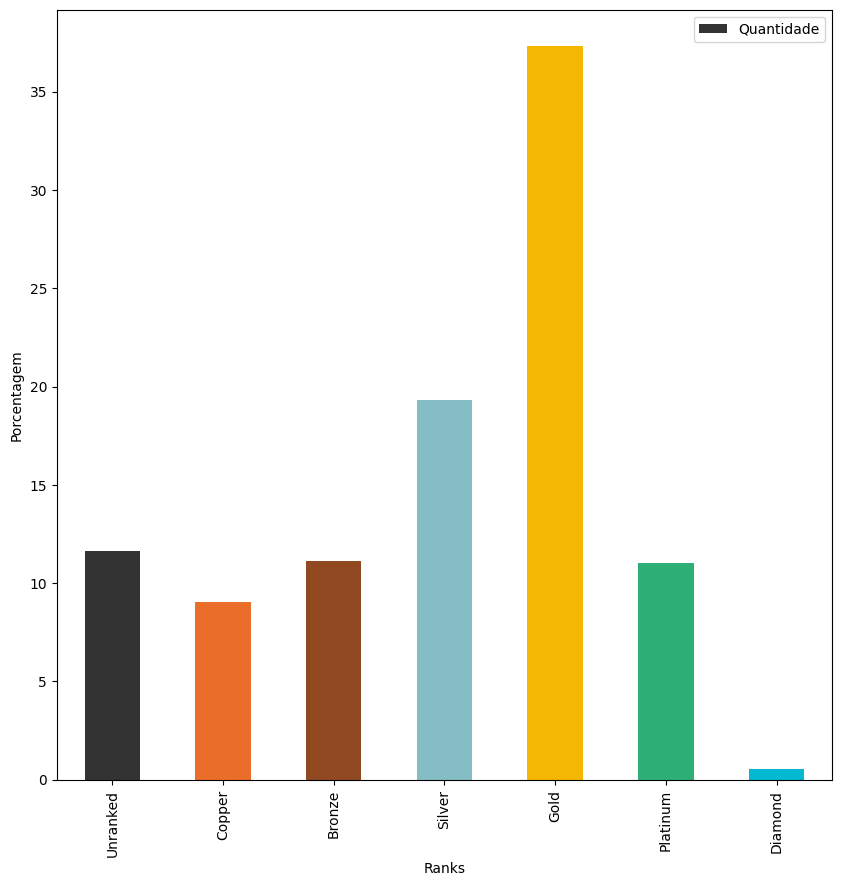

In [14]:
rank = data[["skillrank", "team"]].groupby("skillrank").count() / data.shape[0] * 100
rank.columns = ['Quantidade']
rank = rank.loc[["Unranked", "Copper", "Bronze", "Silver", "Gold", "Platinum", "Diamond"]]

print(rank)
color = ["#333333", "#ea6d2a", "#914922", "#85bdc4", "#f4b802", "#2faf78", "#04b9d1"]


rank.plot(kind="bar", y="Quantidade", ylabel="Porcentagem", xlabel="Ranks", fontsize=10, figsize=(10, 10), color=color)

#### Resultado:

Pelo gráfico, podemos notar uma enorme disparidade entre os ranks:
- O rank "Gold" tem a maior quantidade de jogadores dentro do rank;
- O rank "Diamond" tem a menor quantidade, com menos de 1% dos jogadores.

Esse resultado é esperado, pois jogadores mais investidos no jogo tendem a chegar em ranks mais altos ("Silver" e "Gold"). O rank "Diamond" representa os jogadores de maior nível do jogo, logo é comum que há uma concentração pífia de jogadores.

## Plataforma:

Para a análise, olhamos a quantidade de jogadores que jogam em cada plataforma

          Quantidade
platform            
PC         13.714667
PS4        51.301325
XONE       34.984008


<Axes: xlabel='Plataformas', ylabel='Porcentagem'>

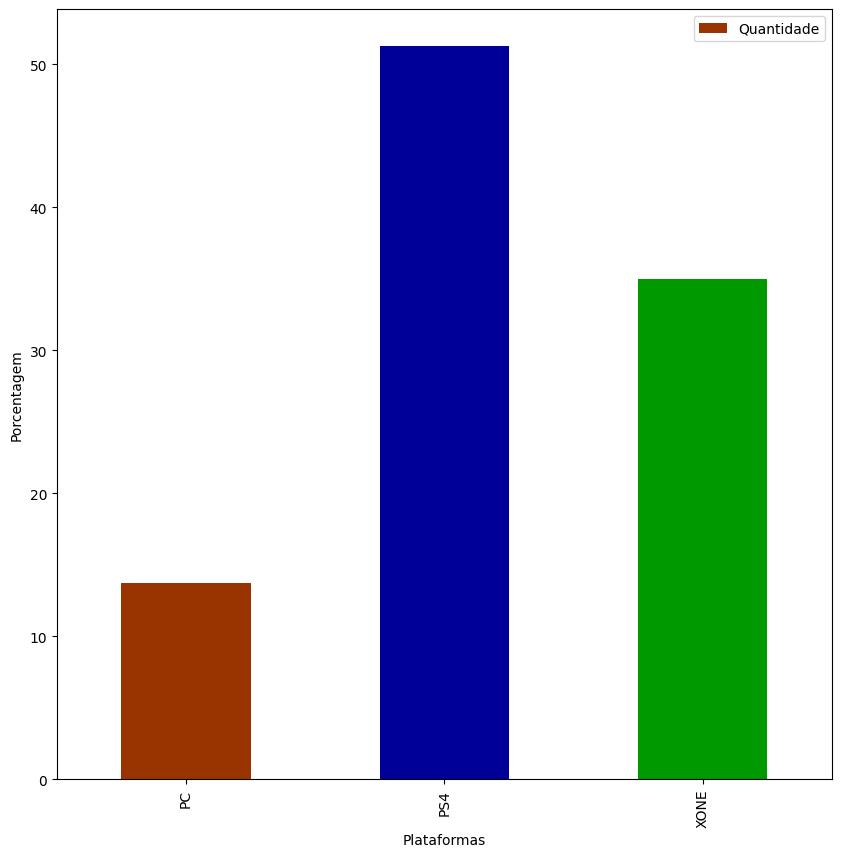

In [28]:
platform = data[["platform", "team"]].groupby("platform").count() / data.shape[0] * 100
platform.columns = ['Quantidade']

print(platform)
color = ["#993300", "#000099", "#009900"]


platform.plot(kind="bar", y="Quantidade", ylabel="Porcentagem", xlabel="Plataformas", fontsize=10, figsize=(10, 10), color=color)

#### Resultado:

Pelo gráfico, fica aparente uma enorme disparidade entre a popularidade de cada plataforma.
- Os consoles ("X One" e "PS4") são muitos mais populares que PC.
- PS4 representa mais da metade da população de jogadores (51.3%)

Possíveis fatores para esse resultado:
- Consoles são mais baratos que comprar/montar um PC.
- O preço do jogo difere dependendo da plataforma, sendo mais barato (e atraente) no PS4.

### Duração por Rank

              Duracao
skillrank            
Unranked   186.179810
Copper     177.369294
Bronze     181.556671
Silver     184.532358
Gold       187.991501
Platinum   191.429451
Diamond    191.201358


<Axes: xlabel='Mapa', ylabel='Porcentagem'>

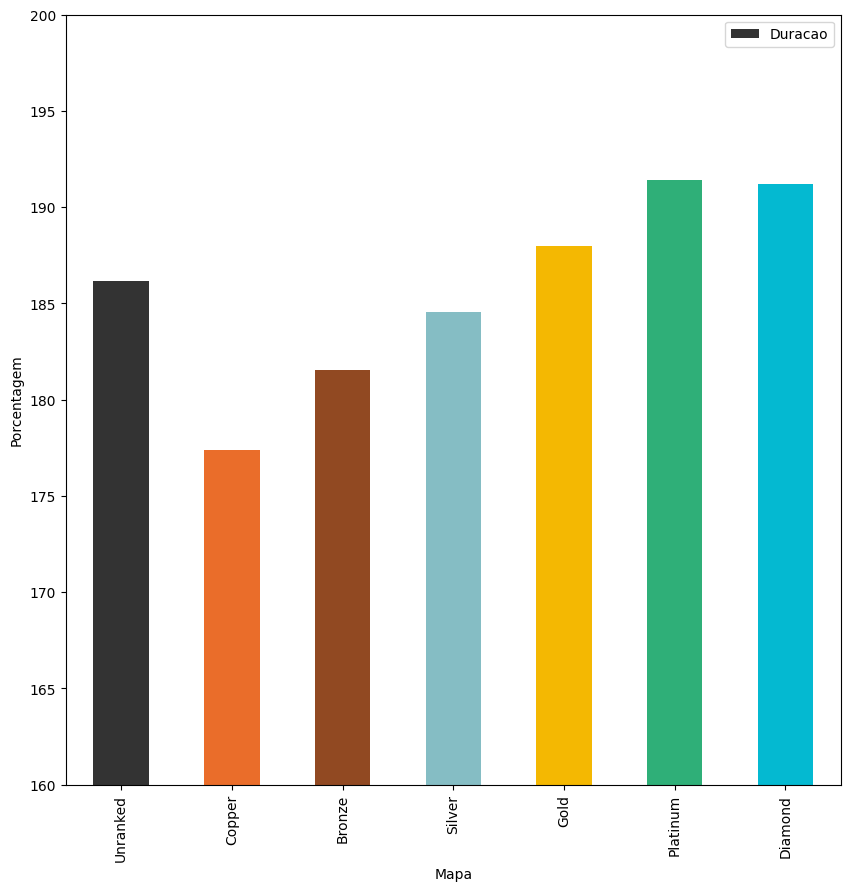

In [5]:
round_ = data[["skillrank", "roundduration"]].groupby("skillrank").mean()
round_.columns = ['Duracao']
round_ = round_.loc[["Unranked", "Copper", "Bronze", "Silver", "Gold", "Platinum", "Diamond"]]

print(round_)
color = ["#333333", "#ea6d2a", "#914922", "#85bdc4", "#f4b802", "#2faf78", "#04b9d1"]

round_.plot(kind="bar", y="Duracao", ylabel="Porcentagem", xlabel="Mapa", fontsize=10, figsize=(10, 10), color=color, ylim=(160, 200))